In [3]:

import cv2
import matplotlib.pyplot as plt
import pandas as pd
PATH = "/mnt/d/Datasets/mini-DDSM/"
imgPATH = PATH + "MINI-DDSM-Complete-PNG-16/"
benign_roi_path = PATH + "ROI/Benign/"
malignant_roi_path = PATH + "ROI/Malignant/"
fullimg_benign_path = PATH + "fullimg/benign/"
fullimg_Malignant_path = PATH + "fullimg/malignant/"

In [4]:
csvdata = pd.read_excel(PATH + str("Data.xlsx"))
category = csvdata.Status.to_numpy()
img_path = csvdata.fullPath.to_numpy()
mask_path = csvdata.Tumour_Contour.to_numpy()
filename = csvdata.fileName.to_numpy()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [5]:
def ROI_extraction(mask_dir,image_dir,filename,roi_dir):
    img = cv2.imread(mask_dir,cv2.IMREAD_GRAYSCALE)
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    # img = cv2.drawContours(img,[cnt],0,(0,255,255),2)
    # img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    data = cv2.imread(image_dir,cv2.IMREAD_GRAYSCALE)
    # data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
    data = cv2.medianBlur(data,3)
    data = clahe.apply(data)
    if h>224 and w>224:
        y -=100
        x -=100
        h +=200
        w += 200
        if x<0:
            x=0
        elif x+w>data.shape[1]:
            x = data.shape[1] - 224
        if y<0:
            y=0
        elif y+h>data.shape[0]:
            y = data.shape[0] - 224
    else:  
        if h < 224:
            y = int(y + (h/2) - 112)
            h=224
            if y<0:
                y=0
            elif y+h>data.shape[0]:
                y = data.shape[0] - 224
        if w < 224:
            x = int(x+(w/2)-112)
            w=224  
            if x<0:
                x=0
            elif x+w>data.shape[1]:
                x = data.shape[1] - 224
    
    
    data = data[y:y+h,x:x+w]
    data=cv2.resize(data,(224,224))
    cv2.imwrite(roi_dir+filename,data)

def Dataset_Selection(image_dir,filename,data_dir):
    data = cv2.imread(image_dir,cv2.IMREAD_GRAYSCALE)
    data = cv2.medianBlur(data,3)
    data = clahe.apply(data)
    data = cv2.resize(data,(256,512))
    cv2.imwrite(data_dir+filename,data)
    


# Seperating Datas

In [6]:
# for i,x in enumerate(category):
#     if x == "Benign":
#         if mask_path[i] == "-":
#             print(filename[i] + " benign image has no ROI")
#         else:
#             mask = imgPATH + mask_path[i].replace('\\','/')
#             image_file = imgPATH + img_path[i].replace('\\','/')
#             Dataset_Selection(image_file,filename[i],fullimg_benign_path)
#             print(filename[i] + " to benign directory")
#     elif x == "Cancer":
#         if mask_path[i] == "-":
#             print(filename[i] + " malignant image has no ROI")
#         else:
#             mask = imgPATH + mask_path[i].replace('\\','/')
#             image_file = imgPATH + img_path[i].replace('\\','/')
#             Dataset_Selection(image_file,filename[i],fullimg_Malignant_path)
#             print(filename[i] + " to malignant directory")
#     else:
#         print(filename[i] + " is normal image and not extracted")

# print("Extraction completed.")

# Extract ROI

In [7]:
for i,x in enumerate(category):
    if x == "Benign":
        if mask_path[i] == "-":
            print(filename[i] + " benign image has no ROI")
        else:
            mask = imgPATH + mask_path[i].replace('\\','/')
            image_file = imgPATH + img_path[i].replace('\\','/')
            ROI_extraction(mask,image_file,filename[i],benign_roi_path)
            print(filename[i] + " to benign roi directory")
    elif x == "Cancer":
        if mask_path[i] == "-":
            print(filename[i] + " malignant image has no ROI")
        else:
            mask = imgPATH + mask_path[i].replace('\\','/')
            image_file = imgPATH + img_path[i].replace('\\','/')
            ROI_extraction(mask,image_file,filename[i],malignant_roi_path)
            print(filename[i] + " to malignant roi directory")
    else:
        print(filename[i] + " is normal image and not extracted")

print("Extraction completed.")

C_0029_1.LEFT_CC.png to benign roi directory
C_0029_1.LEFT_MLO.png to benign roi directory
C_0029_1.RIGHT_CC.png benign image has no ROI
C_0029_1.RIGHT_MLO.png benign image has no ROI
C_0033_1.LEFT_CC.png benign image has no ROI
C_0033_1.LEFT_MLO.png benign image has no ROI
C_0033_1.RIGHT_CC.png to benign roi directory
C_0033_1.RIGHT_MLO.png to benign roi directory
C_0217_1.LEFT_CC.png benign image has no ROI
C_0217_1.LEFT_MLO.png benign image has no ROI
C_0217_1.RIGHT_CC.png to benign roi directory
C_0217_1.RIGHT_MLO.png to benign roi directory
C_0234_1.LEFT_CC.png benign image has no ROI
C_0234_1.LEFT_MLO.png benign image has no ROI
C_0234_1.RIGHT_CC.png to benign roi directory
C_0234_1.RIGHT_MLO.png to benign roi directory
C_0235_1.LEFT_CC.png benign image has no ROI
C_0235_1.LEFT_MLO.png benign image has no ROI
C_0235_1.RIGHT_CC.png to benign roi directory
C_0235_1.RIGHT_MLO.png to benign roi directory
C_0236_1.LEFT_CC.png benign image has no ROI
C_0236_1.LEFT_MLO.png benign image 

In [9]:
img = cv2.imread(imgPATH + str("Benign/0241/C_0241_1.LEFT_MLO.png"))
img.shape[0]

2372

187 927 409 338


True

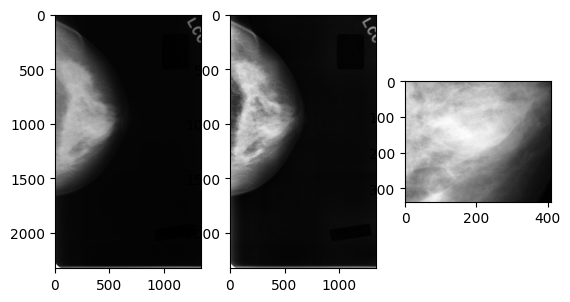

In [4]:
img = cv2.imread(imgPATH + str("Benign/0029/C_0029_1.LEFT_CC_Mask.png"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,0)
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
# img = cv2.drawContours(img,[cnt],0,(0,255,255),2)
# img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
print(x,y,w,h)
data = cv2.imread(imgPATH + str("Benign/0029/C_0029_1.LEFT_CC.png"))
data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

plt.subplot(1,3,1)
plt.imshow(data, cmap="gray")
data = clahe.apply(data)
plt.subplot(1,3,2)
plt.imshow(data, cmap="gray")
data = data[y:y+h,x:x+w]
plt.subplot(1,3,3)
plt.imshow(data, cmap="gray")
cv2.imwrite(PATH+str("testing1.png")
            ,data
            # ,[cv2.IMWRITE_JPEG_QUALITY, 100]
            )

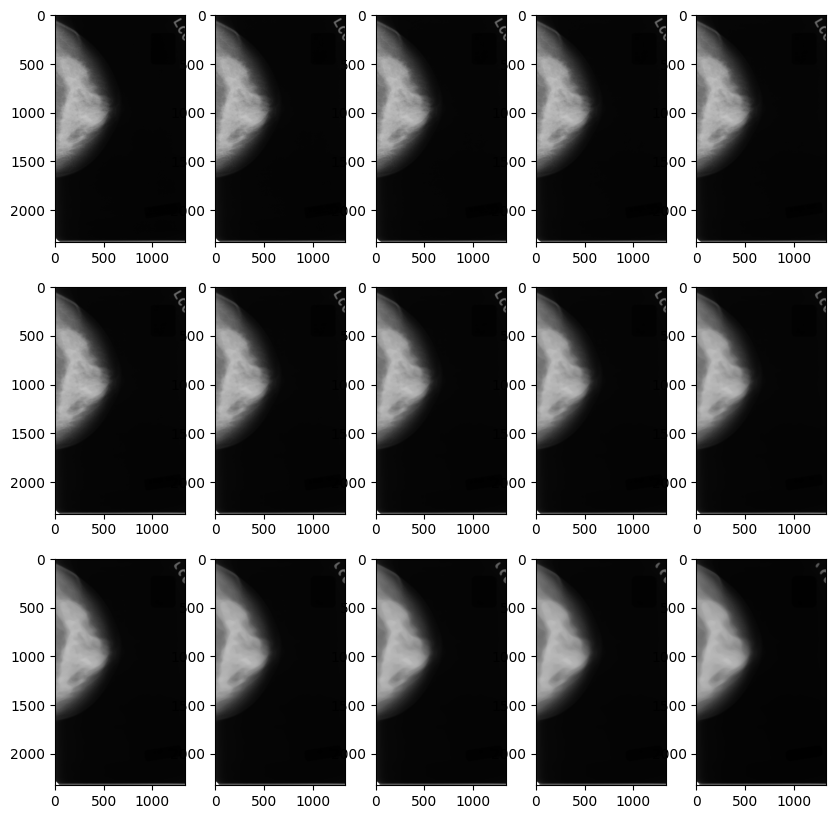

In [8]:
data = cv2.imread(imgPATH + str("Benign/0029/C_0029_1.LEFT_CC.png"))
data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
for x,i in enumerate(range(1, 31, 2)):
    data = cv2.medianBlur(data, i)
    plt.subplot(3,5,x+1)
    plt.imshow(data, cmap = "gray")
        